In [1]:
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
import pandas as pd
import sys, os

# Import the path prefix from the parent directory
# Get the current notebook's directory
notebook_dir = os.path.dirname(os.path.abspath(''))

# Add the parent directory to sys.path
sys.path.append(notebook_dir)

# Now we can import PATH_PREFIX
from path_prefix import PATH_PREFIX

In [3]:
# We will load some flights to inspect the sanity

df_sample = pd.read_csv(f'{PATH_PREFIX}/data/sample/sample.csv')
df_sample.head()

,id,lat,lon,velocity,heading,vertrate,baroaltitude,geoaltitude,lastposupdate
0,UAL1436 a0e6c6,31.206479,-94.487036,263.005690,45.237740,4.87680,9517.38,10043.16,1.653264e+09
1,SWQ0122 a54c70,32.666171,-93.722572,223.427477,310.143396,0.32512,10965.18,11468.10,1.653264e+09
2,N1511L a0d06c,32.743469,-96.787463,33.914309,279.605204,-0.65024,365.76,403.86,1.653264e+09
3,SWA2677 ad7f96,31.390686,-96.435403,243.913737,152.354025,-14.95552,7612.38,8008.62,1.653264e+09
4,UAL2197 ab942f,31.220957,-94.666058,238.844997,29.270361,6.82752,8122.92,8496.30,1.653264e+09


In [4]:
# Pick one callsign, which is the first one
print('Picked callsign:', df_sample['id'].iloc[0])
df_flight = df_sample[df_sample['id'] == df_sample['id'].iloc[0]]
# Subtract lastposupdate from its smallest value
df_flight['lastposupdate'] = df_flight['lastposupdate'] - df_flight['lastposupdate'].min()

print('There are {} rows in the flight'.format(len(df_flight)))
df_flight.head()


Picked callsign: UAL1436 a0e6c6
There are 640 rows in the flight


/var/folders/lm/mmss816142xg1l8dk_cq_j_h0000gn/T/ipykernel_2152/2900213089.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flight['lastposupdate'] = df_flight['lastposupdate'] - df_flight['lastposupdate'].min()


,id,lat,lon,velocity,heading,vertrate,baroaltitude,geoaltitude,lastposupdate
0,UAL1436 a0e6c6,31.206479,-94.487036,263.005690,45.237740,4.87680,9517.38,10043.16,0.000
4106,UAL1436 a0e6c6,31.821294,-94.004012,261.193711,45.478784,4.87680,11559.54,12115.80,324.242
5333,UAL1436 a0e6c6,31.896523,-93.914328,259.378257,45.562493,4.87680,11795.76,12352.02,370.499
5588,UAL1436 a0e6c6,31.901923,-93.907882,259.011187,45.482818,5.52704,11826.24,12374.88,373.732
6171,UAL1436 a0e6c6,31.936046,-93.867019,259.754997,45.802409,-0.65024,11894.82,12451.08,394.461


In [8]:
# Load the turns from x.turns.csv
df_turns = pd.read_csv(f'{PATH_PREFIX}/data/wp/sample.turns.csv')
df_turns.head()

df_turns_flight = df_turns[df_turns['id'] == df_flight['id'].iloc[0]]
df_turns_flight.head()

,id,waypoint_name,waypoint_lat,waypoint_lon,waypoint_alt,waypoint_time,waypoint_speed
0,UAL1436 a0e6c6,09ec93fe-8,31.206479,-94.487036,10043.16,1.653264e+09,0.263006
1,UAL1436 a0e6c6,efcd0a3c-6,31.821294,-94.004012,12115.80,1.653264e+09,0.261194
2,UAL1436 a0e6c6,1345d03d-6,35.011436,-89.974384,12428.22,1.653266e+09,0.264769
3,UAL1436 a0e6c6,9c56c0c9-b,37.793976,-81.084945,12443.46,1.653269e+09,0.249579
4,UAL1436 a0e6c6,a497e665-8,38.466440,-79.036804,8351.52,1.653270e+09,0.246869


From dark to bright: from old to new


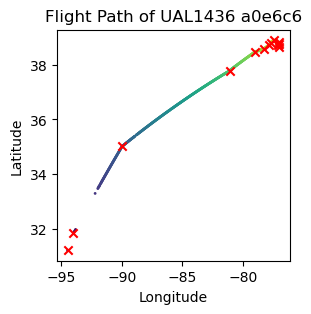

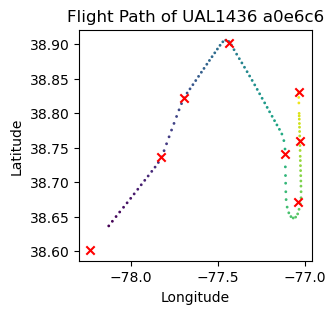

In [18]:
# Plot the 3D trajectory: lastposupdate, lat, lon with lastposupdate is the color
print('From dark to bright: from old to new')
plt.figure(figsize=(3, 3))
plt.scatter(df_flight['lon'], df_flight['lat'], c=df_flight['lastposupdate'], cmap='viridis', s=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Flight Path of {}'.format(df_flight['id'].iloc[0]))

# Plot the turns using a cross
plt.scatter(df_turns_flight['waypoint_lon'], df_turns_flight['waypoint_lat'], c='red', marker='x')
plt.show()

# Create a new figure but zoom in to the last n rows
n = 100
plt.figure(figsize=(3, 3))
plt.scatter(df_flight['lon'].iloc[-n:], df_flight['lat'].iloc[-n:], c=df_flight['lastposupdate'].iloc[-n:], cmap='viridis', s=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Flight Path of {}'.format(df_flight['id'].iloc[0]))

# Plot the last m turns using a cross
m = 8
plt.scatter(df_turns_flight['waypoint_lon'].iloc[-m:], df_turns_flight['waypoint_lat'].iloc[-m:], c='red', marker='x')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Flight Path of {}'.format(df_flight['id'].iloc[0]))
plt.show()

In [ ]:
# 